# <CENTER> **Riiid Test Answer Prediction**

## <CENTER> **Задача**

В приложенных файлах находятся данные по прохождению студентами тестов на образовательной платформе. Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

## <CENTER> **Необходимо**

Используя библиотеку `pandas` (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

## <CENTER> **Описание данных**

Для выполнения задания необходимы следующие файлы: **train.csv**, **lectures.csv**, **questions.csv**.

## <CENTER> **Решение**

**Импортируем библиотеки**:

In [1]:
# Для работы с данными
import pandas as pd
import numpy as np

# Для построения графиков
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### **`1.` train.csv**

* `row_id`: (int64) Идентификатор строки;

* `timestamp`: (int64) Время в миллисекундах между этим взаимодействием с пользователем и первым завершением события от этого пользователя;

* `user_id`: (int32) Идентификатор пользователя;

* `content_id`: (int16) Идентификационный код для взаимодействия с пользователем;

* `content_type_id`: (int8) 0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции;

* `task_container_id`: (int16) Идентификатор пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения к любому из них. Все эти трое будут иметь общий идентификатор task_container_id;

* `user_answer`: (int8) Ответ пользователя на вопрос, если таковой имеется. Для лекций прочтите -1 как ноль;

* `answered_correctly`: (int8) Если пользователь ответил правильно. Для лекций прочтите -1 как ноль;

* `prior_question_elapsed_time`: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос из предыдущей группы вопросов, игнорируя любые промежуточные лекции. Имеет значение NULL для первого пакета вопросов или лекции пользователя. Обратите внимание, что время — это среднее время, которое пользователь потратил на решение каждого вопроса в предыдущем пакете;

* `prior_question_had_explanation`: (bool) Увидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий блок вопросов, игнорируя любые лекции между ними. Значение распространяется на один пакет вопросов и является нулевым для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью вводного диагностического теста, по которому он не получил никакой обратной связи.

**Прочитаем данные:**

In [2]:
# Загружаем файл 'train.csv'
train_data = pd.read_csv('data/train.csv')

# Создадим копию
train_df = train_data.copy()

In [3]:
# Выведем первые пять строк
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Выведем информацию данного датасета:

In [4]:
# Выведем информацию датасета
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


В данном датафрейме представлены признаки следующих типов: 8 признаков типа `int64`, 1 признак типа `float64` и 1 признак типа `object`.

**Проверим данные на наличие пропусков:**

Суммарное количество пропусков в данных: 2744044 

Информация по количествам пропусков: 

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64 

prior_question_elapsed_time       2.322958
prior_question_had_explanation    0.387736
dtype: float64


<Axes: >

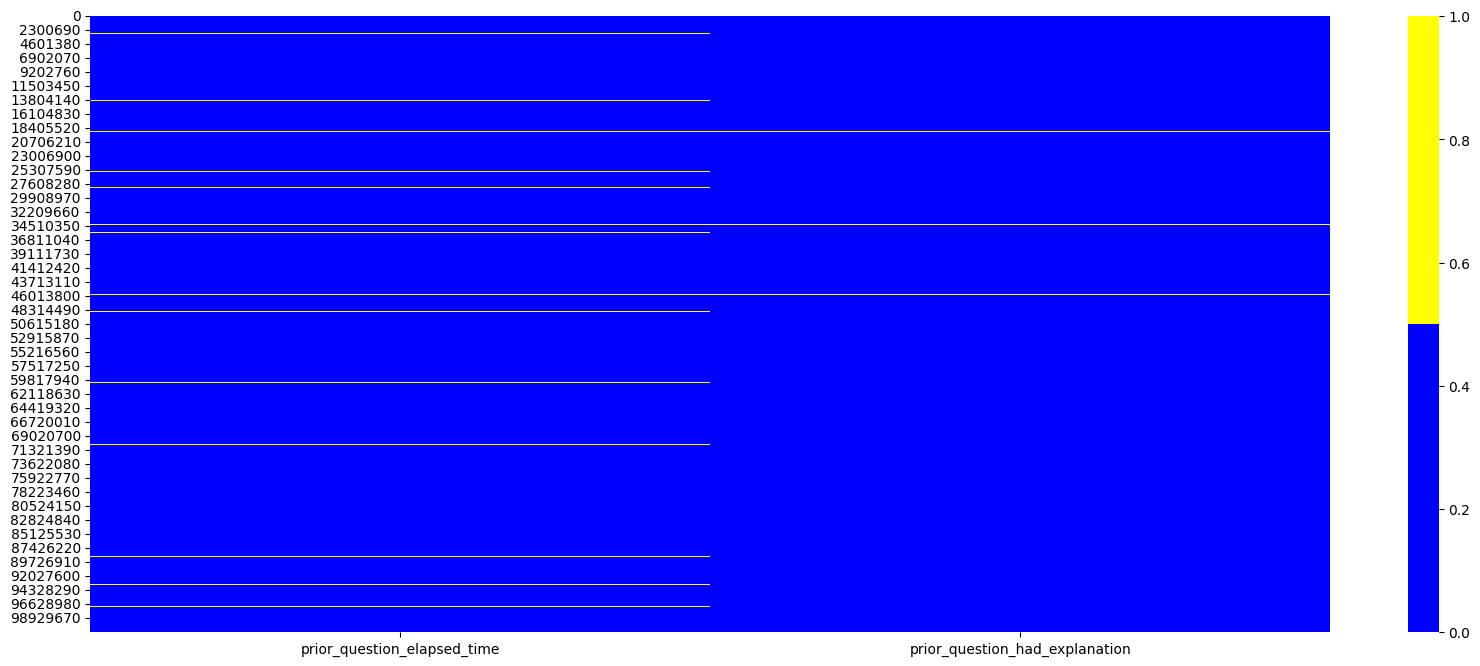

In [3]:
# Выводим суммарное количество пропусков
print('Суммарное количество пропусков в данных: {} \n'.format(train_df.isnull().sum().sum()))

# Выводим признаки с сумрным количеством пропусков
print('Информация по количествам пропусков: \n\n{} \n'.format(train_df.isnull().sum()))



# Построим тепловую карту пропусков
# Создаём функцию отображения пропущенных значений на тепловой карте
def missing_values_heatmap(data):
    
    # Рассчитываем количество пропусков
    cols_null_persent = data.isnull().mean() * 100
    cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending = False)
    print(cols_with_null)
    
    # Задаём параметры графика
    colors = ['blue', 'yellow']
    fig = plt.figure(figsize = (20, 8))
    cols = cols_with_null.index
    
    # Строим тепловую карту
    ax = sns.heatmap(
        data = data[cols].isnull(),
        cmap = sns.color_palette(colors)
    )
    
    return ax


# Применяем полученную функцию к нашему датасету
missing_values_heatmap(train_df)

Из полученной тепловой карты видно, что пропуски есть в признаках `prior_question_elapsed_time` и `prior_question_had_explanation` (2.3% и 0.4% соответственно). Так как доля пропущенных значений в данных очень мала, просто удалим строки, содержащие пропуски:

In [6]:
# Удаляем строки с пропусками
train_df = train_df.dropna(subset = ['prior_question_elapsed_time'])
train_df = train_df.dropna(subset = ['prior_question_had_explanation'])


# Проверяем, что пропущенные значения отсутствуют
print("Количество пропущенных значений в признаке 'prior_question_elapsed_time': {}".format(train_df['prior_question_elapsed_time'].isnull().sum()))
print("Количество пропущенных значений в признаке 'prior_question_had_explanation': {}".format(train_df['prior_question_had_explanation'].isnull().sum()))


# Выводим размерность таблицы
print('Размерность таблицы после удаления пропусков: {}'.format(train_df.shape))

Количество пропущенных значений в признаке 'prior_question_elapsed_time': 0
Количество пропущенных значений в признаке 'prior_question_had_explanation': 0
Размерность таблицы после удаления пропусков: (98878794, 10)


**Проверим наличие дубликатов:**

In [6]:
# Создаём список признаков
dupl_columns = list(train_df.columns)

# Создаём маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = train_df.duplicated(subset = dupl_columns)
train_duplicates = train_df[mask]
print(f'Число найденных дубликатов: {train_duplicates.shape[0]}')

Число найденных дубликатов: 0


В данном датасете дубликаты отсутствуют.

#### $1.1$

Выведем количество студентов:

In [4]:
nunique_users = train_df.user_id.nunique()
print(f'Общее количество студентов: {nunique_users}')

Общее количество студентов: 393569


#### $1.2$

Выведем наибольшее количество вопросов, на которые ответил пользователь:

In [5]:
user_percent = train_df[train_df.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean = 'mean', Answers = 'count')
print(f'Наибольшее количество вопросов, на которые ответил пользователь {user_percent.Answers.max()}')

Наибольшее количество вопросов, на которые ответил пользователь 17608


#### $1.3$

Подсчитаем количество студентов, давших правильный ответ:

In [14]:
# Выделим только тех студентов, которые только пытались задавать вопросы
asking_users = train_df[train_df['content_type_id'] == 0]



# Проверим, сколько студентов дало правильный ответ, 
# а так же подсчитаем количество вопросов, которые они пытались задать
new_data_1 = asking_users[['user_id', 'answered_correctly', 'prior_question_elapsed_time']].groupby('user_id').sum().reset_index()
new_data_2 = asking_users[['user_id', 'answered_correctly']].groupby('user_id').count().reset_index()

# Выведем первые пять строк
new_data_1.head()

,user_id,answered_correctly,prior_question_elapsed_time
0,115,32,896999.0
1,124,7,544997.0
2,2746,11,325000.0
3,5382,84,4470000.0
4,8623,70,2819600.0


In [16]:
# Теперь добавляем столбец счетчика в основную датаграмму,
# а также определение коэффициента успешности каждого пользователя
new_data_1['total'] = new_data_2['answered_correctly']
new_data_1['percent'] = np.round((new_data_1['answered_correctly'] / new_data_1['total']) * 100)

# Произведём сортировку датасета по столбцу 'percent'          
sort_data = new_data_1.sort_values('percent', ascending = False)
sort_data.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,percent
390617,2131395801,2,14000.0,2,100.0
11057,60215278,1,0.0,1,100.0
186326,1019843964,1,0.0,1,100.0
283847,1552058047,30,348661.0,30,100.0
118248,648296210,30,440994.0,30,100.0


#### $1.4$

Добавим признак `minutes` к данным, которы покажет время в минутах, затраченное каждым пользователем:

In [17]:
new_data_1['minutes'] = np.round(new_data_1['prior_question_elapsed_time'] / 60000)
new_data_1.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,percent,minutes
0,115,32,896999.0,46,70.0,15.0
1,124,7,544997.0,30,23.0,9.0
2,2746,11,325000.0,19,58.0,5.0
3,5382,84,4470000.0,125,67.0,74.0
4,8623,70,2819600.0,109,64.0,47.0


#### $1.5$

Построим распределение количества времени, затраченного каждым студентом:

C:\Users\User\AppData\Local\Temp\ipykernel_8396\2890717079.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




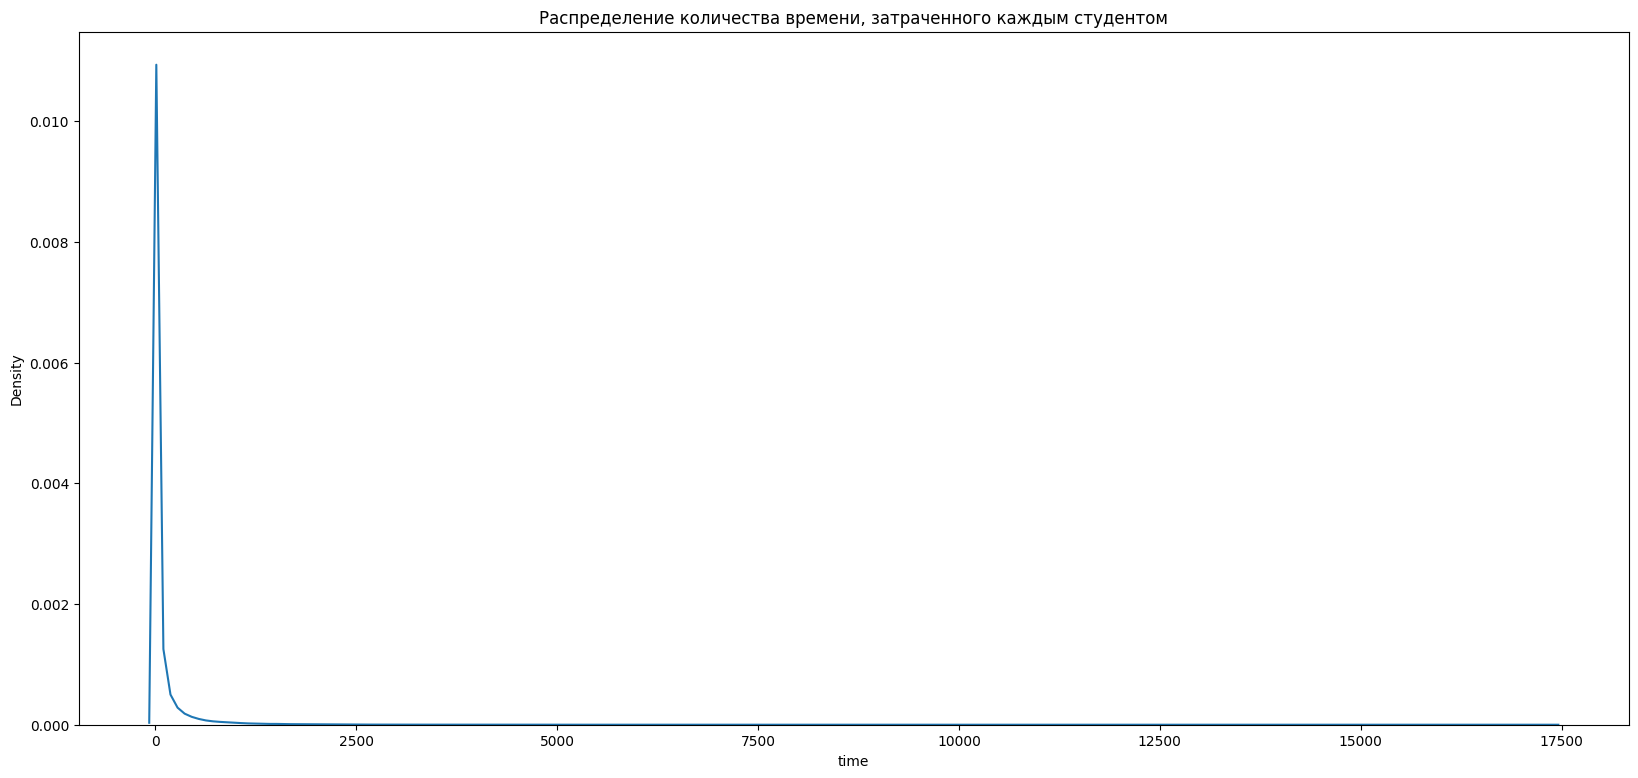

In [18]:
# Задаём размеры графика
plt.figure(figsize = (20, 9))

# Строим график
sns.distplot(
    new_data_1['minutes'].values,
    hist = False
)

plt.ticklabel_format(
    style = 'plain',
    axis = 'y'
)

plt.ticklabel_format(
    style = 'plain',
    axis = 'x'
)

plt.title('Распределение количества времени, затраченного каждым студентом')
plt.xlabel('time')
plt.show()

**Вывод:**

Данный график показывает, что лишь небольшое количество студентов потратили больше времени, чем другие.

#### $1.6$

Выведем 40 самых используемых идентификационных кодов (`content_id`):

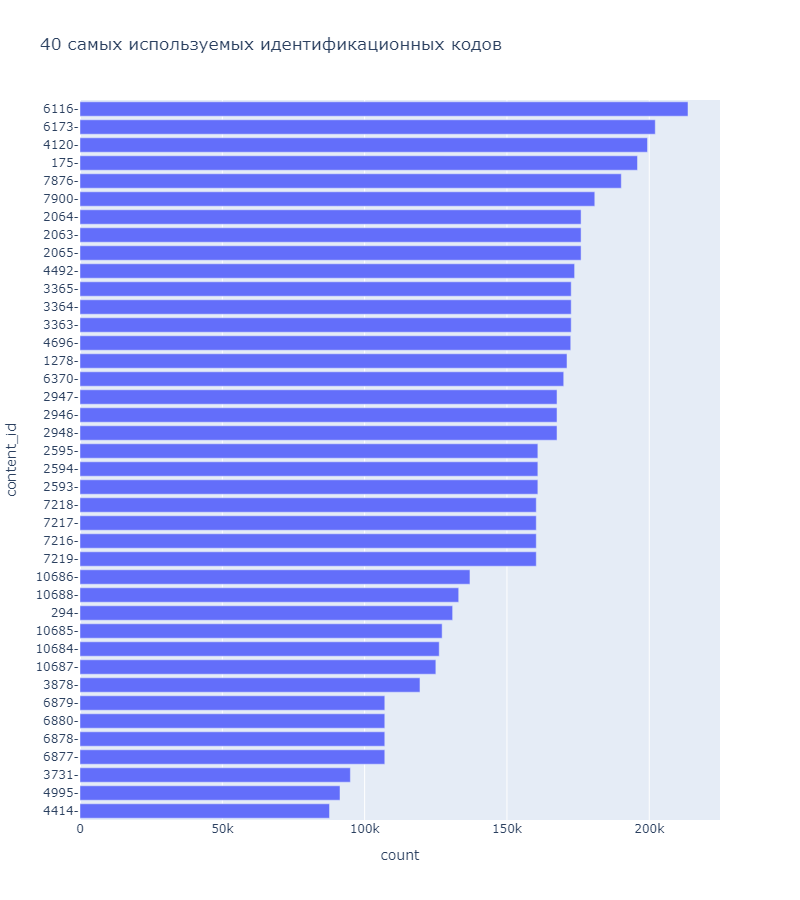

In [ ]:
# Выводим уникальные значения и их количества
ds = train_df['content_id'].value_counts().reset_index()

# Создаём столбцы идентификационных кодов и их количество
ds.columns = [
    'content_id', 
    'count'
]

# Сортируем значения идентификационных кодов по количеству 
# и выделяем 40 из них
ds['content_id'] = ds['content_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)



# Строим распределение
fig = px.bar(
    data_frame = ds, 
    x = 'count', 
    y = 'content_id', 
    orientation='h', 
    title = '40 самых используемых идентификационных кодов',  
    width = 800,
    height = 900
)

# Выводим график
fig.show('png')

#### $1.7$

Построим распределение призгака правильных ответов:

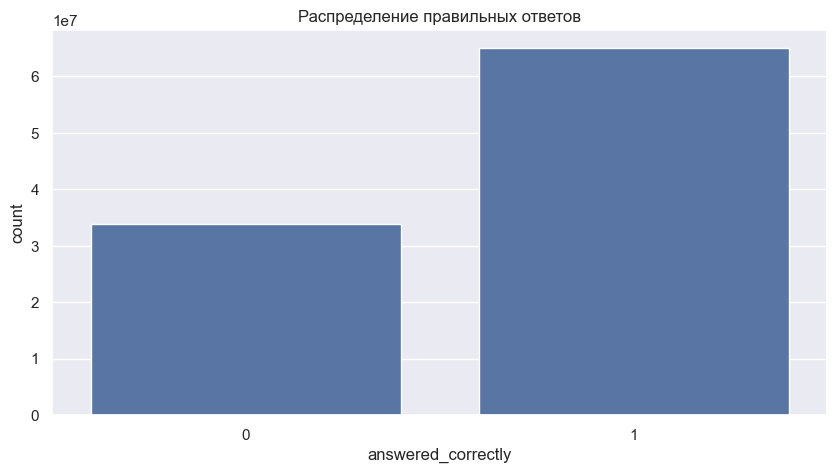

In [7]:
# Задаём параметры графика
sns.set(rc = {'figure.figsize': (10, 5)})



# Строим график
countplot_hist = sns.countplot(
    x = 'answered_correctly',
    data = train_df
)

# Название графика
countplot_hist.set_title('Распределение правильных ответов');

#### $1.8$

Построим распределение признака `content_type_id`:

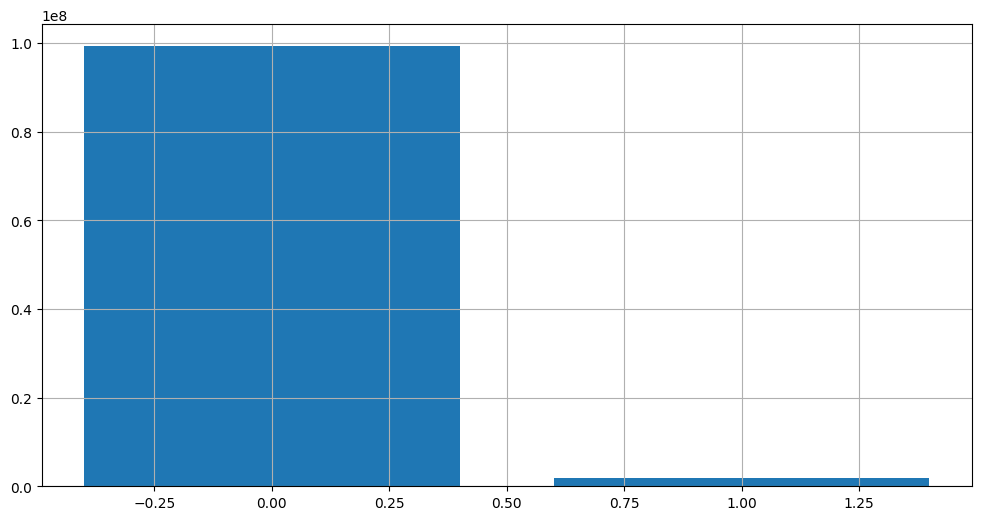

Text(0.5, 1.0, "Працентное распределение признака 'content_type_id'")

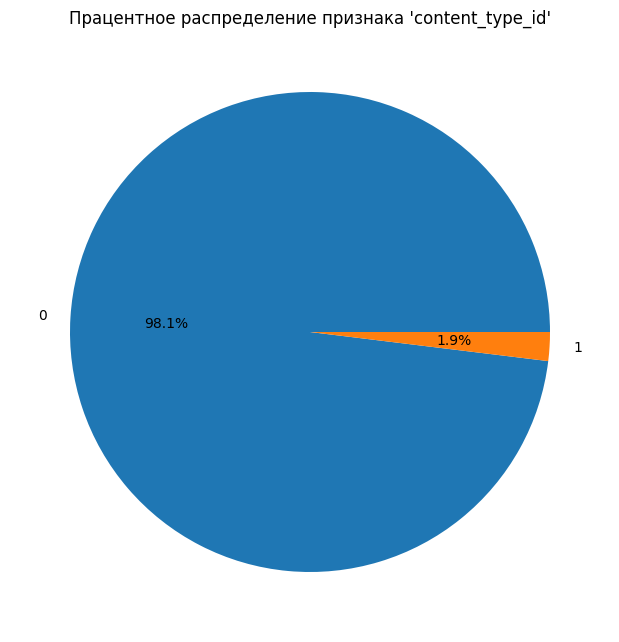

In [13]:
# Создадим таблицу, где: 
# 0 - это вопрос, заданный студенту,
# 1 - просмотр студентом лекции
content_type_distribution = train_df['content_type_id'].value_counts()



# Строим столбчатую диаграмму
fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(
    x = content_type_distribution.index,
    height = content_type_distribution
)

plt.grid()
plt.show();



# Строик круговую диаграмму
fig = plt.figure(figsize = (6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    content_type_distribution,
    labels = content_type_distribution.index,
    autopct = '%.1f%%'
)

axes.set_title("Працентное распределение признака 'content_type_id'")

#### $1.9$

Построим распределение признака правильных ответов в зависимости от признака идентификационного кода для взаимодействия со студентом:

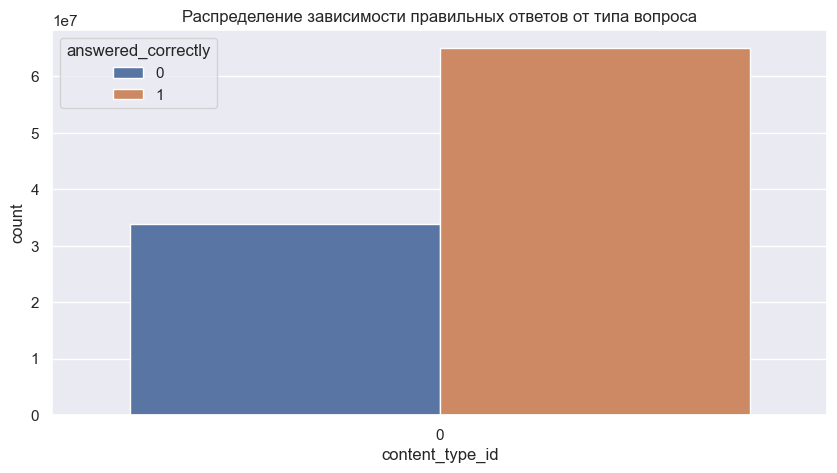

In [11]:
# Задаём параметры графика
sns.set(rc = {'figure.figsize': (10, 5)})



# Строим график
countplot_hist = sns.countplot(
    x = 'content_type_id',
    hue = 'answered_correctly',
    data = train_df
)

# Название графика
countplot_hist.set_title('Распределение зависимости правильных ответов от типа вопроса');

#### $1.10$

Построим распределение признака `user_answer` (общего количества ответов):

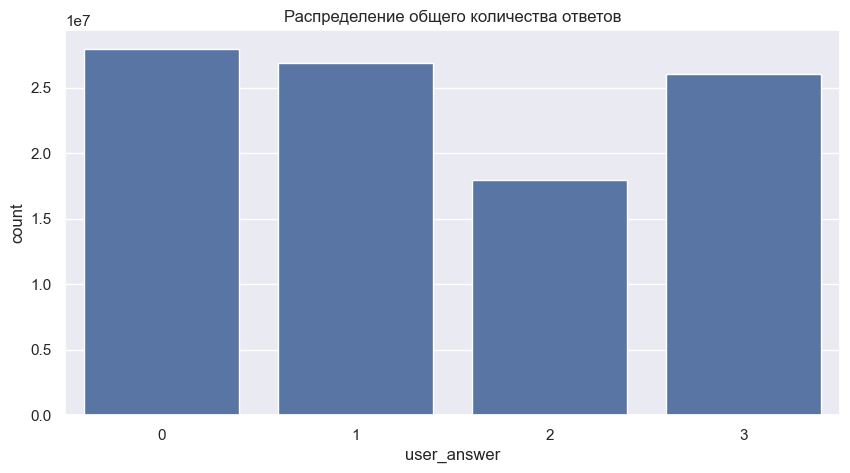

In [5]:
# Задаём параметры графика
sns.set(rc = {'figure.figsize': (10, 5)})



# Строим график
countplot_hist = sns.countplot(
    x = 'user_answer',
    data = train_df
)

# Название графика
countplot_hist.set_title('Распределение общего количества ответов');

#### $1.11$

Выведем таблицу ответов по каждому студенту:

In [19]:
# Рассмотрим признаки общего количества ответов и количества правильных ответов относительно id студента
user_answers = train_df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()

# Также добавим признак доли правильных ответов
user_answers['answered_correctly_prop'] = user_answers['answered_correctly'] / user_answers['user_answer']

# Выведем описание характеристик
user_answers.describe()

,user_id,user_answer,answered_correctly,answered_correctly_prop
count,3.936560e+05,393656.000000,393656.000000,3.936390e+05
mean,1.076358e+09,353.875889,160.763700,inf
std,6.201319e+08,1038.467530,507.219402,NaN
min,1.150000e+02,0.000000,-11.000000,-1.929825e-01
25%,5.387596e+08,37.000000,11.000000,3.000000e-01
50%,1.077717e+09,60.000000,23.000000,3.983402e-01
75%,1.613533e+09,214.000000,92.000000,4.759825e-01
max,2.147483e+09,25162.000000,14229.000000,inf


Выведем медианное значение количества ответов:

In [20]:
print(f'Медианное значение количества ответов: {user_answers.user_answer.median()}')

Медианное значение количества ответов: 60.0


#### $1.12$

Выведем распределение общего количества ответов по студентам:

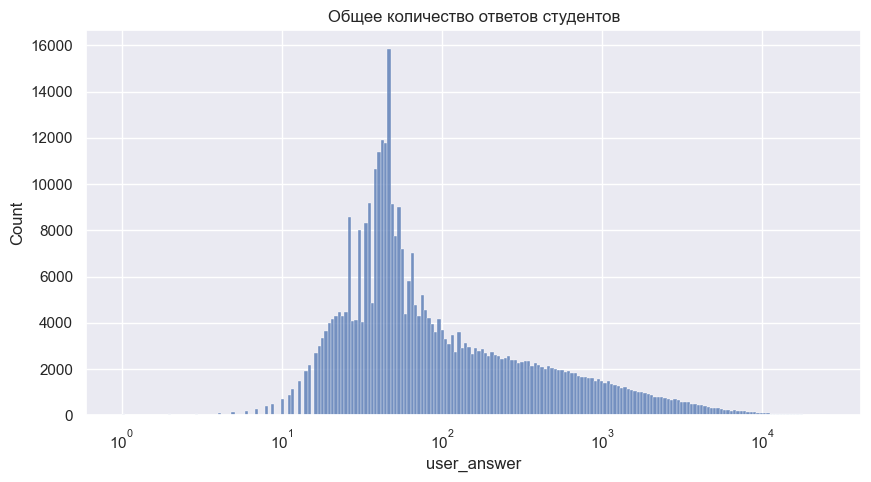

In [32]:
# Задаём параметры графика
sns.set(rc = {'figure.figsize': (10, 5)})



# Строим график распределения
histplot = sns.histplot(
    data = user_answers,
    x = 'user_answer',
    log_scale = True
)

# Название графика
histplot.set_title('Общее количество ответов студентов');

Построим график распределения студентов, которые прорешали больше вопросов:

<Axes: >

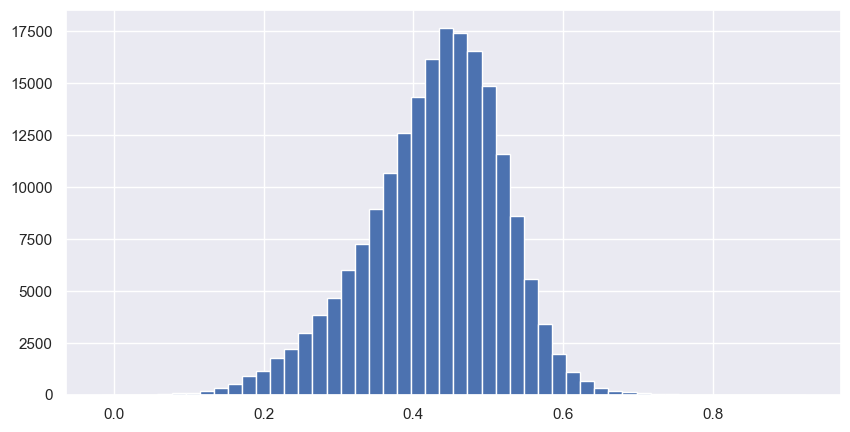

In [ ]:
# Задаём параметры графика
sns.set(rc = {'figure.figsize': (10, 5)})
 
# Строим график
user_answers.query('user_answer > 60')['answered_correctly_prop'].hist(bins = 50)

**Вывод:**

По полученным графикам можно заключить, что студенты, которые нарешали меньше медианного количества вопросов, справлялись с тестами хуже, чем те, кто нарешал больше медианы.

#### $1.13$

Построим распределение признака `timestamp`:

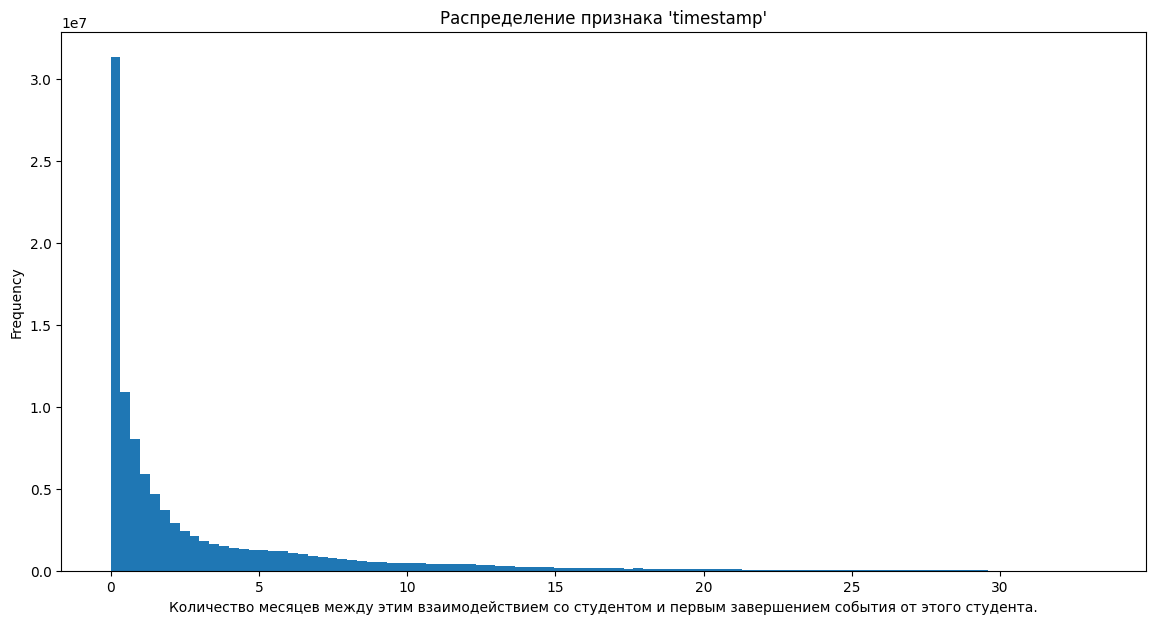

In [28]:
# Переведём значения признака 'timestamp' в года
# В 1 году 31536000000 мс
ts_year = train_df['timestamp'] / (31536000000/12)

# Задаём параметры графика
fig = plt.figure(figsize = (14, 7))

# Строим гистограмму
ts_year.plot.hist(bins = 100)

# Название гистограммы
plt.title("Распределение признака 'timestamp'")
plt.xticks(rotation = 0)
plt.xlabel('Количество месяцев между этим взаимодействием со студентом и первым завершением события от этого студента.')

# Выводим график
plt.show()

### **`2.` lectures.csv: Метаданные лекций, просматриваемых пользователями по мере их обучения.**

* `lecture_id`: Внешний ключ для столбца *content_id* поезда/теста, когда тип контента — лекция (1);

* `part`: Код категории верхнего уровня для лекции;

* `tag`: Один тег-коды для лекции. Значение тегов не будет указано, но этих кодов достаточно для группировки лекций;

* `type_of`: Краткое описание основной цели лекции.

**Загрузим данные:**

In [4]:
# Загружаем файл 'lectures.csv'  
lectures_data = pd.read_csv('data/lectures.csv')

# Создадим копию
lectures_df = lectures_data.copy()

In [ ]:
# Выведем первые пять строк
lectures_df.head()

Выведем информацию данного датасета:

In [ ]:
lectures_df.info()

В данных представлено 3 признака типа `int64`, и один признак типа `object`. Также легко заметить, что в датасете отсутствуют пропуски.

**Проверим наличие дубликатов:**

In [6]:
# Создаём список признаков
dupl_columns = list(lectures_df.columns)

# Создаём маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = lectures_df.duplicated(subset = dupl_columns)
lectures_duplicates = lectures_df[mask]
print(f'Число найденных дубликатов: {lectures_duplicates.shape[0]}')

Число найденных дубликатов: 0


#### $2.1$

Построим распределение признака `parts` в зависимости от количества тегов `tag`:

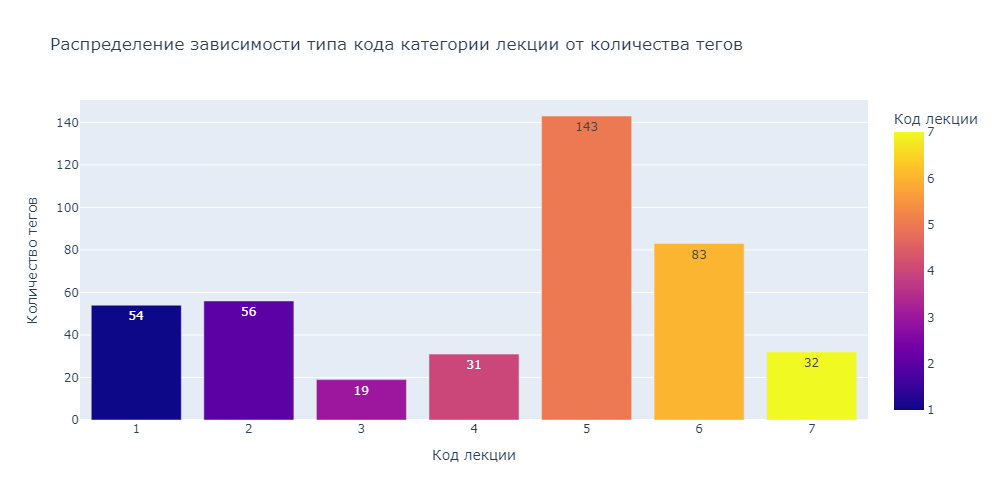

In [27]:
# Создаём DataFrame, в котором отразим количество тегов по кодам категории лекций
tag_part_data = lectures_df.groupby(
    by = 'part',
    as_index = False
)[['tag']].count().sort_values(by = 'tag', ascending = False)



# Строим график
fig = px.bar(
    data_frame = tag_part_data,
    x = 'part',
    y = 'tag',
    color = 'part',
    height = 500,
    width = 1000,
    text = 'tag',
    
    labels = {
        'part': 'Код лекции',
        'tag': 'Количество тегов'
    },
    
    title = 'Распределение зависимости типа кода категории лекции от количества тегов'
)

# Выводим график
fig.show('png')

#### $2.2$

Теперь построим распределение зависимости типа лекций от количества тегов:

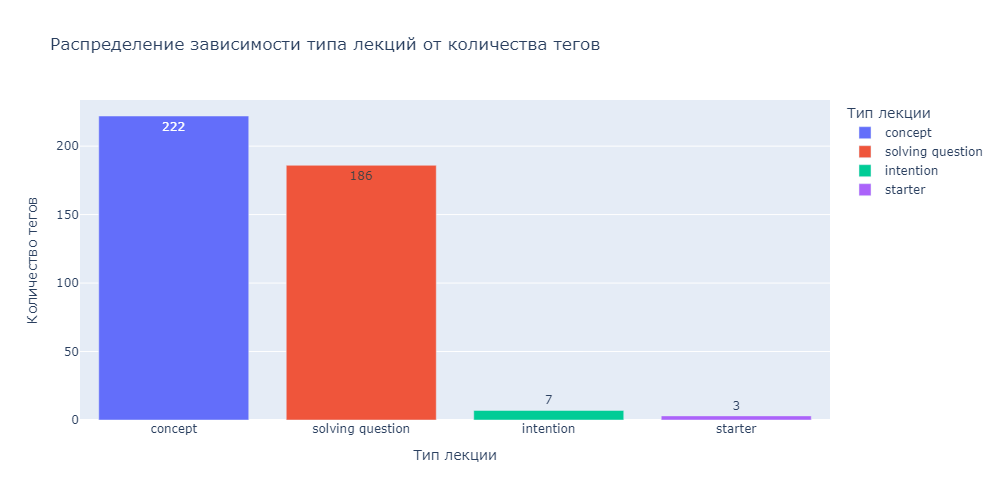

In [24]:
# Создаём DataFrame, в котором отразим количество тегов по лекциям
tag_lectures_data = lectures_df.groupby(
    by = 'type_of',
    as_index = False
)[['tag']].count().sort_values(by = 'tag', ascending = False)



# Строим гистограмму
fig = px.bar(
    data_frame = tag_lectures_data,
    x = 'type_of',
    y = 'tag',
    color = 'type_of',
    height = 500,
    width = 1000,
    text = 'tag',
    
    labels = {
        'type_of': 'Тип лекции',
        'tag': 'Количество тегов'
    },
    
    title = 'Распределение зависимости типа лекций от количества тегов'
)

# Выводим график
fig.show('png')

**Вывод:**

Из полученного гравика следует, что наибольшее количество проводимых лекций в количестве 222 - это лекции типа `concept`. В немного меньшем количестве проводились лекции типа `solving question`. И в небольшом количестве (7 и 3) проводились лекции типа `intention` и `starter` соответственно. 

### **`3.` questions.csv: Метаданные по вопросам, заданным пользователям.**

* `question_id`: Внешний ключ для столбца *content_id* поезда/теста, когда тип контента — вопрос (0);

* `bundle_id`: Код, по которому вопросы подаются вместе;

* `correct_answer`: Ответ на вопрос. Можно сравнить со столбцом *train user_answer*, чтобы проверить, был ли прав пользователь;

* `part`: Соответствующий раздел теста *TOEIC*;

* `tags`: Один или несколько подробных кодов тегов для вопроса. Значение тегов не будет указано, но этих кодов достаточно для группировки вопросов;

**Прочитаем данные:**

In [7]:
# Загружаем файл 'questions.csv'
questions_data = pd.read_csv('data/questions.csv')

# Создадим копию
questions_df = questions_data.copy()

In [8]:
# Выведем первые пять строк
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


Выведем информацию данного датасета:

In [30]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


В данных представлено 4 признака типа `int64` и один признак типа `object`. Также в датасете присутствует один пропуск в столбце `tags`.

Удалим строку, содержащую пропуск:

In [9]:
# Удаляем строку с пропуском
questions_df = questions_df.dropna(subset = ['tags'])

# Проверяем, что пропущенные значения отсутствуют
print("Количество пропущенных значений в признаке 'tags': {}".format(questions_df['tags'].isnull().sum()))

Количество пропущенных значений в признаке 'tags': 0


**Проверим наличие дубликатов:**

In [31]:
# Создаём список признаков
dupl_columns = list(questions_df.columns)

# Создаём маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = questions_df.duplicated(subset = dupl_columns)
questions_duplicates = questions_df[mask]
print(f'Число найденных дубликатов: {questions_duplicates.shape[0]}')

Число найденных дубликатов: 0


#### $3.1$

Построим распределение признака правильных ответов `correct_answer`, в зависимости от вопроса `question_id`:

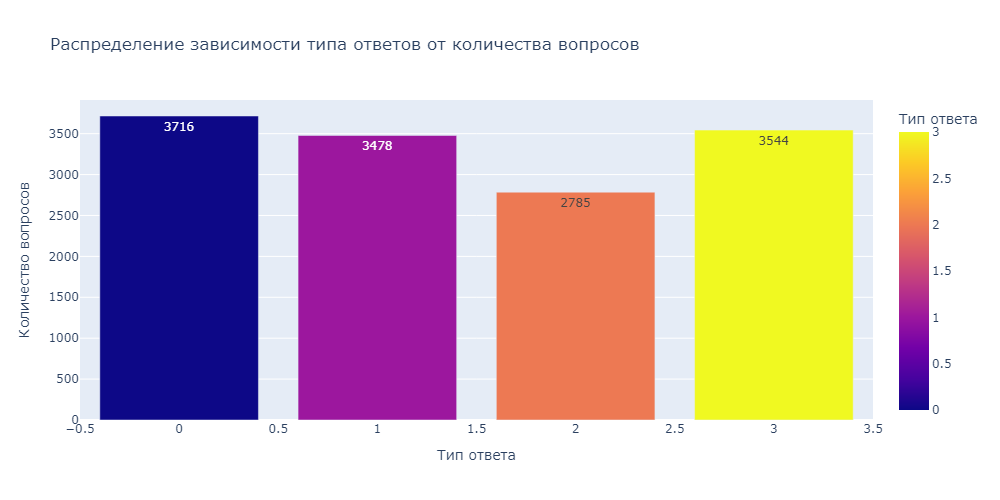

In [39]:
# Создаём DataFrame, в котором отразим количество правильных ответов по вопросам
answer_quest_data = questions_df.groupby(
    by = 'correct_answer',
    as_index = False
)[['question_id']].count().sort_values(by = 'question_id', ascending = False)



# Строим гистограмму
fig = px.bar(
    data_frame = answer_quest_data,
    x = 'correct_answer',
    y = 'question_id',
    color = 'correct_answer',
    height = 500,
    width = 1000,
    text = 'question_id',
    
    labels = {
        'correct_answer': 'Тип ответа',
        'question_id': 'Количество вопросов'
    },
    
    title = 'Распределение зависимости типа ответов от количества вопросов'
)

# Выводим график
fig.show('png')

#### $3.2$

Теперь построим распределение зависимости раздела теста *TOEIC* от количества вопросов:

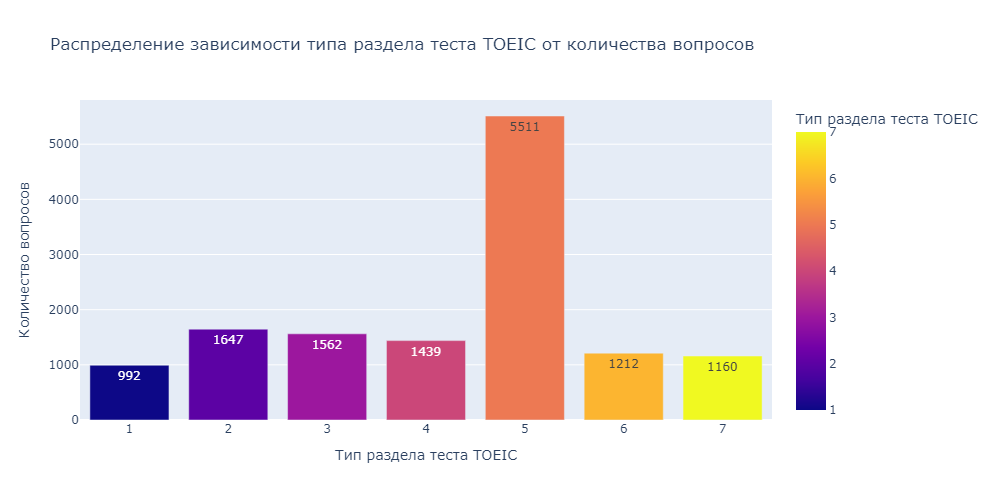

In [ ]:
# Выводим уникальные значения и их количества
answer_quest_data = questions_df['part'].value_counts().reset_index()

# Создаём столбцы раздела теста TOEIC и их количество
answer_quest_data.columns = [
    'part', 
    'count'
]

# Сортируем значения тестов по количеству 
answer_quest_data = answer_quest_data.sort_values(['count'])



# Строим гистограмму
fig = px.bar(
    data_frame = answer_quest_data,
    x = 'part',
    y = 'count',
    color = 'part',
    height = 500,
    width = 1000,
    text = 'count',
    
    labels = {
        'part': 'Тип раздела теста TOEIC',
        'count': 'Количество вопросов'
    },
    
    title = 'Распределение зависимости типа раздела теста TOEIC от количества вопросов'
)

# Выводим график
fig.show('png')

#### $3.3$

Построим распределение признака правильных ответов `correct_answer`, в зависимости от кода, по которому вопросы подаются вместе `bundle_id`:

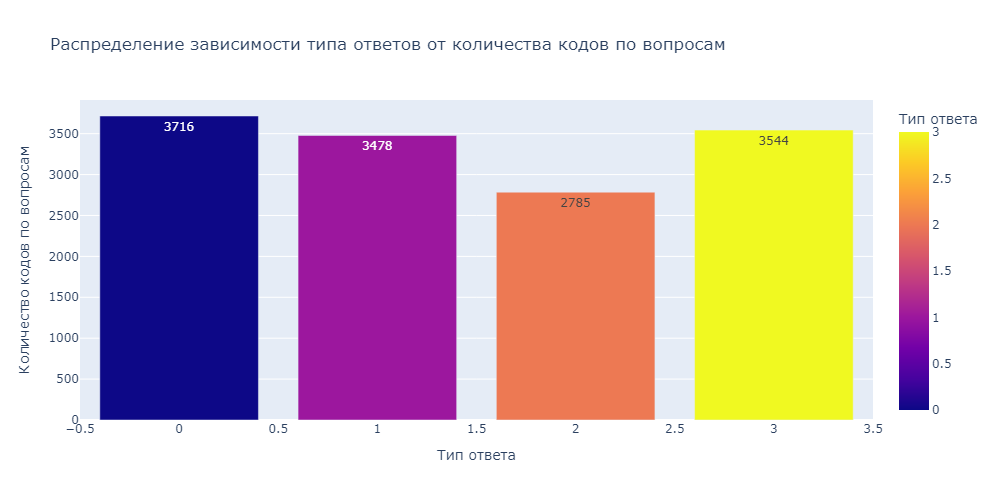

In [13]:
# Создаём DataFrame, в котором отразим количество правильных ответов по кодам вопросов
answer_bundle_data = questions_df.groupby(
    by = 'correct_answer',
    as_index = False
)[['bundle_id']].count().sort_values(by = 'bundle_id', ascending = False)



# Строим гистограмму
fig = px.bar(
    data_frame = answer_bundle_data,
    x = 'correct_answer',
    y = 'bundle_id',
    color = 'correct_answer',
    height = 500,
    width = 1000,
    text = 'bundle_id',
    
    labels = {
        'correct_answer': 'Тип ответа',
        'bundle_id': 'Количество кодов по вопросам'
    },
    
    title = 'Распределение зависимости типа ответов от количества кодов по вопросам'
)

# Выводим график
fig.show('png')

#### $3.4$

Обработаем признак `tags`:

In [9]:
# Разделим каждую строку столбца tags по пробелам
questions_df['tag'] = questions_df['tags'].str.split(' ')

# Преобразуем каждое значение полученного списка в отдельную строку
questions_df = questions_df.explode('tag')

# Соединим обе таблицы
questions_df = pd.merge(
    questions_df,
    questions_df.groupby('question_id')['tag'].count().reset_index(),
    on = 'question_id'
)

# Удалим столбец tag_x
questions_df = questions_df.drop(['tag_x'], axis = 1)

# Задаём название колонок
questions_df.columns = [
    'question_id',
    'bundle_id',
    'correct_answer',
    'part',
    'tags',
    'tags_number'
]

# Удаляем дубликаты
questions_df = questions_df.drop_duplicates()

# Выведем первые пять строк
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags,tags_number
0,0,0,0,1,51 131 162 38,4
4,1,1,1,1,131 36 81,3
7,2,2,0,1,131 101 162 92,4
11,3,3,0,1,131 149 162 29,4
15,4,4,3,1,131 5 162 38,4


Теперь построи распределение зависимости количества тегов по вопросам:

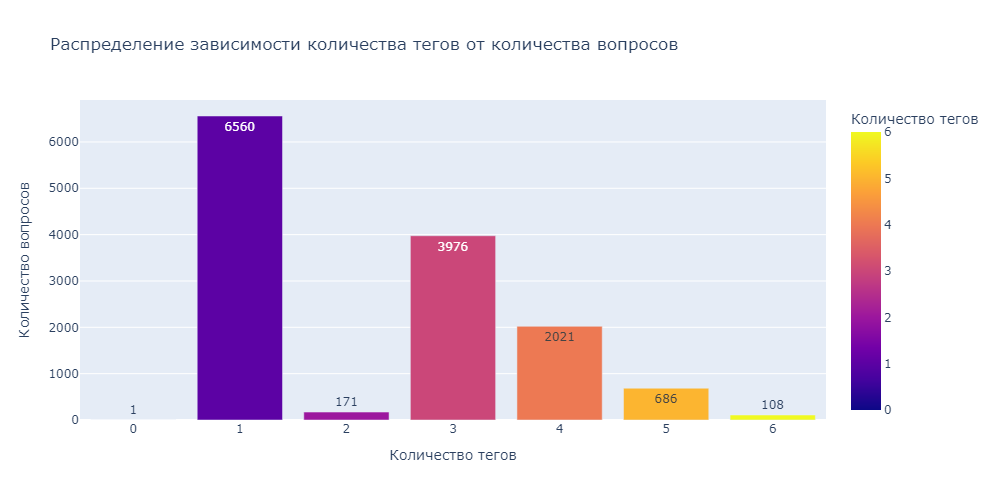

In [12]:
# Создаём DataFrame, в котором отразим количество тегов по вопросам
tag_quest_data = questions_df.groupby(
    by = 'tags_number',
    as_index = False
)[['question_id']].count().sort_values(by = 'question_id', ascending = False)



# Строим гистограмму
fig = px.bar(
    data_frame = tag_quest_data,
    x = 'tags_number',
    y = 'question_id',
    color = 'tags_number',
    height = 500,
    width = 1000,
    text = 'question_id',
    
    labels = {
        'tags_number': 'Количество тегов',
        'question_id': 'Количество вопросов'
    },
    
    title = 'Распределение зависимости количества тегов от количества вопросов'
)

# Выводим график
fig.show('png')

**Вывод:**

Из полученной гистограммы видно, что самое большое количество вопросов (6560) содержит по одному тегу. Таже видно, что практически каждый вопрос содержит какое-то количество тегов за исключением одного вопроса.